# Recurrent Neural Networks for Simple Time Series Data (Synthetic Data) by `Mr. Harshit Dawar`

## Importing the Required Libraries

In [1]:
from tensorflow.keras.layers import Dense, SimpleRNN, Flatten, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np

### Generating Data without Noise 

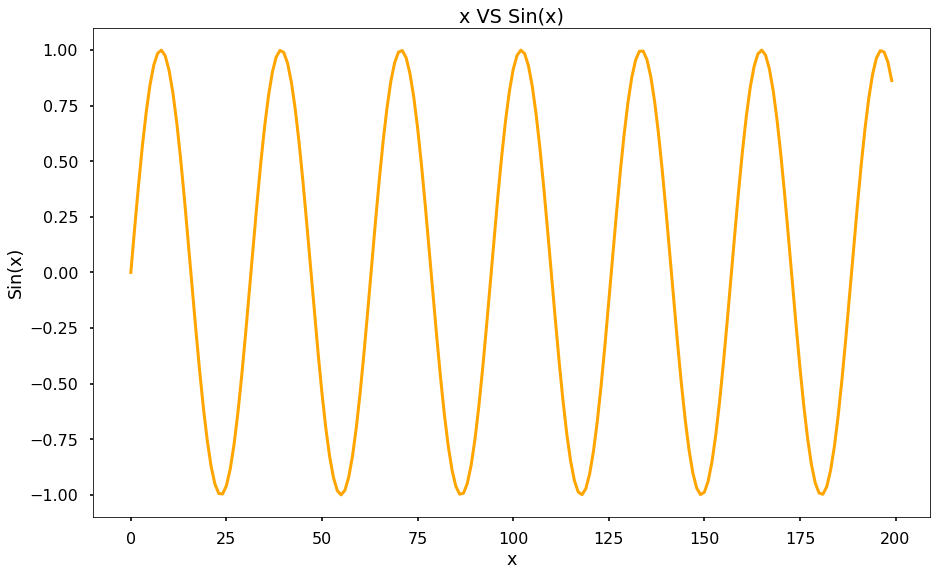

In [2]:
syntheticTimeSeriesData = np.sin(0.2 * np.arange(200))
plt.style.use("seaborn-poster")
plt.figure(figsize = (15, 9))
plt.plot(syntheticTimeSeriesData, c = "orange", linestyle = "solid", linewidth = 3)
plt.title("x VS Sin(x)")
plt.xlabel("x")
plt.ylabel("Sin(x)")
plt.show()

In [3]:
T = 15
Dimension = 1
data = []
forecast = []

for t in range(len(syntheticTimeSeriesData) - T):
    data.append(
        syntheticTimeSeriesData[t : t + T]
    )
    forecast.append(
        syntheticTimeSeriesData[t + T]
    )

data = np.array(data)
forecast = np.array(forecast)

In [4]:
data.shape, forecast.shape

((185, 15), (185,))

In [5]:
data[0]

array([0.        , 0.19866933, 0.38941834, 0.56464247, 0.71735609,
       0.84147098, 0.93203909, 0.98544973, 0.9995736 , 0.97384763,
       0.90929743, 0.8084964 , 0.67546318, 0.51550137, 0.33498815])

In [6]:
forecast[0]

0.1411200080598672

In [7]:
# Changing the shape of the data as required by the RNN (3 Dimensions)
data = data.reshape(-1, T, 1)

In [8]:
data.shape

(185, 15, 1)

### Building a Model with Activation Function

In [9]:
inputShape = Input(shape = (T, Dimension))

# Here by default activation function is Tanh
RNNModel = SimpleRNN(5)(inputShape)
RNNModel = Dense(1)(RNNModel)

model = Model(inputShape, RNNModel)

model.compile(loss = "mse", optimizer = Adam(lr = 0.01))

In [10]:
print(model.summary())

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 15, 1)]           0         
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 5)                 35        
_________________________________________________________________
dense (Dense)                (None, 1)                 6         
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________
None


In [11]:
limit = data.shape[0] // 2

# Fitting the Model
trainedModel = model.fit(
                            data[ :limit],
                            forecast[ :limit],
                            epochs = 500,
    
                            # Reason for taking the validation set as complete seprate half, because in forecast
                            # validation should always be done on future dataset.
                            validation_data = (data[limit: ], forecast[limit: ])
                           )

Epoch 1/500
3/3 [==============================] - 0s 76ms/step - loss: 0.6190 - val_loss: 0.4286
Epoch 2/500
3/3 [==============================] - 0s 12ms/step - loss: 0.3658 - val_loss: 0.2459
Epoch 3/500
3/3 [==============================] - 0s 16ms/step - loss: 0.2117 - val_loss: 0.1383
Epoch 4/500
3/3 [==============================] - 0s 14ms/step - loss: 0.1196 - val_loss: 0.0857
Epoch 5/500
3/3 [==============================] - 0s 14ms/step - loss: 0.0790 - val_loss: 0.0678
Epoch 6/500
3/3 [==============================] - 0s 18ms/step - loss: 0.0660 - val_loss: 0.0668
Epoch 7/500
3/3 [==============================] - 0s 12ms/step - loss: 0.0655 - val_loss: 0.0669
Epoch 8/500
3/3 [==============================] - 0s 12ms/step - loss: 0.0638 - val_loss: 0.0604
Epoch 9/500
3/3 [==============================] - 0s 19ms/step - loss: 0.0565 - val_loss: 0.0499
Epoch 10/500
3/3 [==============================] - 0s 13ms/step - loss: 0.0452 - val_loss: 0.0380
Epoch 11/500
3/3 [=

3/3 [==============================] - 0s 12ms/step - loss: 2.1295e-04 - val_loss: 2.2528e-04
Epoch 80/500
3/3 [==============================] - 0s 11ms/step - loss: 2.1359e-04 - val_loss: 2.2366e-04
Epoch 81/500
3/3 [==============================] - 0s 12ms/step - loss: 2.0757e-04 - val_loss: 2.1904e-04
Epoch 82/500
3/3 [==============================] - 0s 13ms/step - loss: 2.1327e-04 - val_loss: 2.1463e-04
Epoch 83/500
3/3 [==============================] - 0s 10ms/step - loss: 2.0402e-04 - val_loss: 2.2808e-04
Epoch 84/500
3/3 [==============================] - 0s 12ms/step - loss: 2.0806e-04 - val_loss: 2.1203e-04
Epoch 85/500
3/3 [==============================] - 0s 12ms/step - loss: 2.0135e-04 - val_loss: 2.0663e-04
Epoch 86/500
3/3 [==============================] - 0s 12ms/step - loss: 2.0068e-04 - val_loss: 2.0515e-04
Epoch 87/500
3/3 [==============================] - 0s 11ms/step - loss: 1.8842e-04 - val_loss: 2.0698e-04
Epoch 88/500
3/3 [==============================] 

3/3 [==============================] - 0s 12ms/step - loss: 7.3516e-05 - val_loss: 7.5265e-05
Epoch 156/500
3/3 [==============================] - 0s 12ms/step - loss: 7.4441e-05 - val_loss: 7.5148e-05
Epoch 157/500
3/3 [==============================] - 0s 11ms/step - loss: 7.0991e-05 - val_loss: 7.5062e-05
Epoch 158/500
3/3 [==============================] - 0s 11ms/step - loss: 6.9864e-05 - val_loss: 7.4947e-05
Epoch 159/500
3/3 [==============================] - 0s 11ms/step - loss: 6.9262e-05 - val_loss: 7.4238e-05
Epoch 160/500
3/3 [==============================] - 0s 11ms/step - loss: 6.9334e-05 - val_loss: 7.3005e-05
Epoch 161/500
3/3 [==============================] - 0s 12ms/step - loss: 6.8543e-05 - val_loss: 6.9633e-05
Epoch 162/500
3/3 [==============================] - 0s 11ms/step - loss: 6.9027e-05 - val_loss: 6.9877e-05
Epoch 163/500
3/3 [==============================] - 0s 10ms/step - loss: 6.7327e-05 - val_loss: 6.8197e-05
Epoch 164/500
3/3 [=======================

Epoch 231/500
3/3 [==============================] - 0s 13ms/step - loss: 2.6556e-05 - val_loss: 2.8181e-05
Epoch 232/500
3/3 [==============================] - 0s 10ms/step - loss: 2.7557e-05 - val_loss: 2.6527e-05
Epoch 233/500
3/3 [==============================] - 0s 11ms/step - loss: 2.4906e-05 - val_loss: 2.5867e-05
Epoch 234/500
3/3 [==============================] - 0s 10ms/step - loss: 2.5366e-05 - val_loss: 2.6607e-05
Epoch 235/500
3/3 [==============================] - 0s 11ms/step - loss: 2.4579e-05 - val_loss: 2.5294e-05
Epoch 236/500
3/3 [==============================] - 0s 13ms/step - loss: 2.4562e-05 - val_loss: 2.4974e-05
Epoch 237/500
3/3 [==============================] - 0s 10ms/step - loss: 2.4009e-05 - val_loss: 2.5353e-05
Epoch 238/500
3/3 [==============================] - 0s 13ms/step - loss: 2.5451e-05 - val_loss: 2.5169e-05
Epoch 239/500
3/3 [==============================] - 0s 13ms/step - loss: 2.4573e-05 - val_loss: 2.4173e-05
Epoch 240/500
3/3 [=========

Epoch 307/500
3/3 [==============================] - 0s 11ms/step - loss: 1.0908e-05 - val_loss: 9.9333e-06
Epoch 308/500
3/3 [==============================] - 0s 11ms/step - loss: 9.9905e-06 - val_loss: 9.1530e-06
Epoch 309/500
3/3 [==============================] - 0s 12ms/step - loss: 7.9602e-06 - val_loss: 1.0092e-05
Epoch 310/500
3/3 [==============================] - 0s 11ms/step - loss: 7.9518e-06 - val_loss: 1.3602e-05
Epoch 311/500
3/3 [==============================] - 0s 26ms/step - loss: 1.0511e-05 - val_loss: 1.4224e-05
Epoch 312/500
3/3 [==============================] - 0s 15ms/step - loss: 1.1207e-05 - val_loss: 9.9897e-06
Epoch 313/500
3/3 [==============================] - 0s 11ms/step - loss: 1.1073e-05 - val_loss: 7.3887e-06
Epoch 314/500
3/3 [==============================] - 0s 11ms/step - loss: 8.7694e-06 - val_loss: 8.9938e-06
Epoch 315/500
3/3 [==============================] - 0s 11ms/step - loss: 9.2100e-06 - val_loss: 1.0363e-05
Epoch 316/500
3/3 [=========

Epoch 383/500
3/3 [==============================] - 0s 12ms/step - loss: 3.2787e-06 - val_loss: 3.7480e-06
Epoch 384/500
3/3 [==============================] - 0s 12ms/step - loss: 3.2934e-06 - val_loss: 3.3413e-06
Epoch 385/500
3/3 [==============================] - 0s 11ms/step - loss: 3.3328e-06 - val_loss: 2.9067e-06
Epoch 386/500
3/3 [==============================] - 0s 12ms/step - loss: 2.9667e-06 - val_loss: 2.8999e-06
Epoch 387/500
3/3 [==============================] - 0s 23ms/step - loss: 2.8478e-06 - val_loss: 2.7544e-06
Epoch 388/500
3/3 [==============================] - 0s 11ms/step - loss: 2.9352e-06 - val_loss: 3.0598e-06
Epoch 389/500
3/3 [==============================] - 0s 15ms/step - loss: 3.1550e-06 - val_loss: 2.8429e-06
Epoch 390/500
3/3 [==============================] - 0s 12ms/step - loss: 3.1564e-06 - val_loss: 2.8013e-06
Epoch 391/500
3/3 [==============================] - 0s 14ms/step - loss: 3.1204e-06 - val_loss: 3.5316e-06
Epoch 392/500
3/3 [=========

3/3 [==============================] - 0s 10ms/step - loss: 5.4975e-06 - val_loss: 2.1448e-06
Epoch 460/500
3/3 [==============================] - 0s 11ms/step - loss: 3.2658e-06 - val_loss: 4.1559e-06
Epoch 461/500
3/3 [==============================] - 0s 10ms/step - loss: 3.2049e-06 - val_loss: 2.7320e-06
Epoch 462/500
3/3 [==============================] - 0s 11ms/step - loss: 3.6520e-06 - val_loss: 2.6880e-06
Epoch 463/500
3/3 [==============================] - 0s 11ms/step - loss: 4.4518e-06 - val_loss: 3.7967e-06
Epoch 464/500
3/3 [==============================] - 0s 10ms/step - loss: 4.5492e-06 - val_loss: 3.0319e-06
Epoch 465/500
3/3 [==============================] - 0s 10ms/step - loss: 4.2098e-06 - val_loss: 3.9529e-06
Epoch 466/500
3/3 [==============================] - 0s 10ms/step - loss: 2.7631e-06 - val_loss: 2.1257e-06
Epoch 467/500
3/3 [==============================] - 0s 10ms/step - loss: 3.7550e-06 - val_loss: 5.4021e-06
Epoch 468/500
3/3 [=======================

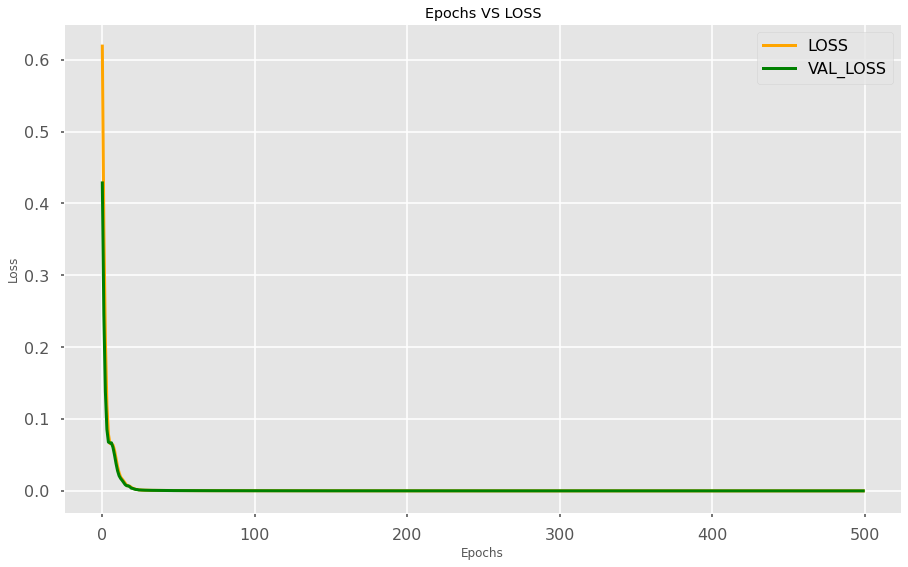

In [13]:
plt.style.use("ggplot")
plt.figure(figsize = (15, 9))
plt.plot(trainedModel.history["loss"], c = "orange", linestyle = "solid", linewidth = 3, label = "LOSS")
plt.plot(trainedModel.history["val_loss"], c = "green", linestyle = "solid", linewidth = 3, label = "VAL_LOSS")
plt.title("Epochs VS LOSS")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [23]:
# Doing forecast using Wrong Approach
trueLabels = forecast[limit : ]
predictions = []

index = limit
while len(predictions) < len(trueLabels):
    temp = model.predict(data[index].reshape(1, -1, 1))[0, 0]
    index += 1
    predictions.append(temp)

In [16]:
data[0].reshape(1, -1, 1).shape

(1, 15, 1)

In [19]:
data.shape

(185, 15, 1)

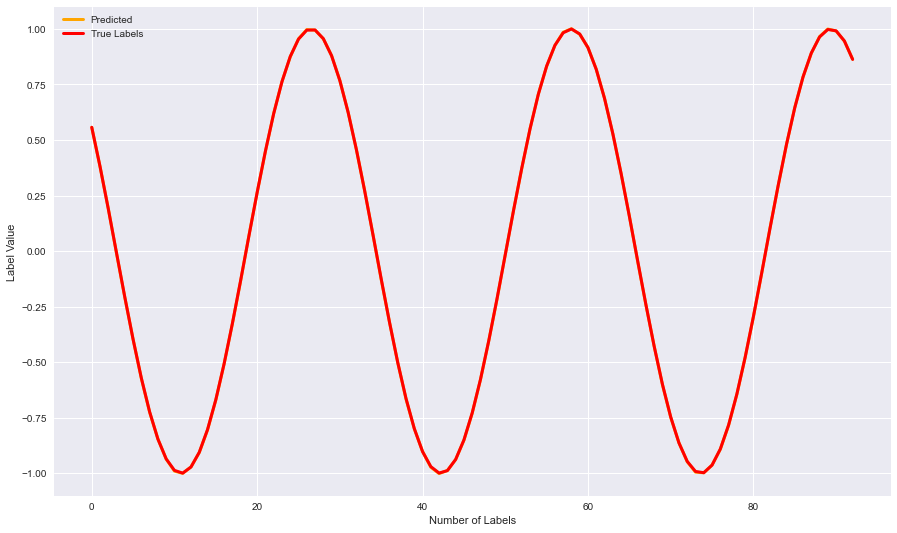

In [26]:
plt.style.use("seaborn")
plt.figure(figsize = (15, 9))
plt.plot(predictions, c = "orange", linestyle = "solid", linewidth = 3, label = "Predicted")
plt.plot(trueLabels, c = "red", linestyle = "solid", linewidth = 3, label = "True Labels")
plt.xlabel("Number of Labels")
plt.ylabel("Label Value")
plt.legend()
plt.show()

In [27]:
# Forecasting with the Correct Approach
trueLabels = forecast[limit : ]
predictions = []

last_Value_Of_Data = data[limit]
while len(predictions) < len(trueLabels):
    temp = model.predict(last_Value_Of_Data.reshape(1, -1, 1))[0, 0]
    predictions.append(temp)
    
    last_Value_Of_Data = np.roll(last_Value_Of_Data, -1)
    last_Value_Of_Data[-1] = temp

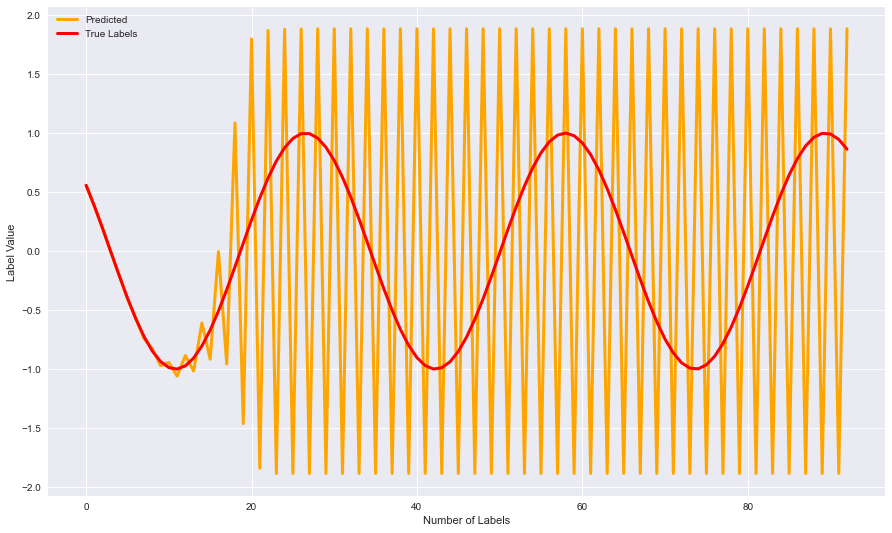

In [28]:
plt.style.use("seaborn")
plt.figure(figsize = (15, 9))
plt.plot(predictions, c = "orange", linestyle = "solid", linewidth = 3, label = "Predicted")
plt.plot(trueLabels, c = "red", linestyle = "solid", linewidth = 3, label = "True Labels")
plt.xlabel("Number of Labels")
plt.ylabel("Label Value")
plt.legend()
plt.show()